# <center> Prosper Loan:  Workflow </center>

This notebook shows some of the essential steps of a workflow for building predictive models. The notebook provides a few examples of each step. The workflow includes:
1. **Problem Definition**:  A clear definition of the problem enables us to identify the appropriate data to gather and technique(s) to use in order to solve the problem. For many problems this many require background reading, discussion with domain experts, and layered problem specification. 
2. **Data Gathering**: We have to know which data to use, where to gather them, and how to make them useful to solve our problem. In many cases, data from multiple sources can provide deeper insights. 
3. **Data Wrangling**: Raw data are generally incomplete, inconsistent, and contain many errors. Thus, we need to prepare the data for further processing. Data wrangling is the process of cleaning, structuring, and enriching raw data into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes, such as analytics.
4. **Exploratory Data Analysis**: Exploratory data analysis (EDA) is an approach of performing initial investigations on our data. EDA normally has descriptive nature and uses graphical statistics to discover patterns, to identify anomalies, to test hypothesis, and to check assumptions regarding our data. 
5. **Data Modelling & Prediction**:  Data modelling involves selecting and optiming the machine learning models that generate the best predictive performance based on the data we have, Once we have developed the best predictive model, we can deploy it to make predictions. 

# 1.0. Problem Definition
This dataset contains the customer's data from a loan company known as Prosper. This dataset comprises of 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
the data can be found the through this link https://www.kaggle.com/datasets/henryokam/prosper-loan-data
  

## The objective is to determine what are the factors affecting BorrowerAPR & loan status,

### features as Term, Loan Original Amount, stated monthly income are expected to have a main role in the analysis

Before moving to the next section, we need to import all packages required to do the analysis by calling the following:

# 2.0. Data Gathering and Import

In [370]:
# Importing data analysis packages
import pandas as pd
import numpy as np

# Importing data visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

from sklearn.model_selection import cross_validate, cross_val_score

# Importing machine learning packages
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import precision_score , recall_score, accuracy_score , confusion_matrix
import sklearn.metrics as metrics


# Miscellaneous
import time
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth',80)
from imblearn.under_sampling import RandomUnderSampler


In [323]:
# Importing datasets
df = pd.read_csv('../input/prosper-loan-data/prosperLoanData.csv')

**Viewing a small part of the dataset**

In [324]:
df.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


In [325]:
df.tail(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


**Viewing data shape**

In [326]:
df.shape

(113937, 81)

We can observe that the training dataset has 113937 entries and 81 columns

The above data includes too many columns that will hinder our investigation to this dataset, therefore I will remove most of unwanted columns, and investigate the columns that are considered as the main features of this dataset based on my point of view.

new dataframe including the new columns

In [327]:
new_cols = ['LoanNumber','Term','LoanStatus','BorrowerAPR','ListingCategory (numeric)','Occupation','EmploymentStatus','EmploymentStatusDuration','IsBorrowerHomeowner','CurrentCreditLines','PublicRecordsLast10Years','AvailableBankcardCredit','IncomeVerifiable','StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment','Recommendations','Investors']
df1 = df[new_cols]
display(df1.head(3))
display(df1.shape)

,LoanNumber,Term,LoanStatus,BorrowerAPR,ListingCategory (numeric),Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentCreditLines,PublicRecordsLast10Years,AvailableBankcardCredit,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,Investors
0,19141,36,Completed,0.16516,0,Other,Self-employed,2.0,True,5.0,0.0,1500.0,True,3083.333333,9425,330.43,0,258
1,134815,36,Current,0.12016,2,Professional,Employed,44.0,False,14.0,1.0,10266.0,True,6125.000000,10000,318.93,0,1
2,6466,36,Completed,0.28269,0,Other,Not available,NaN,False,NaN,0.0,NaN,True,2083.333333,3001,123.32,0,41


(113937, 18)

In [328]:
df1.columns

Index(['LoanNumber', 'Term', 'LoanStatus', 'BorrowerAPR',
       'ListingCategory (numeric)', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentCreditLines',
       'PublicRecordsLast10Years', 'AvailableBankcardCredit',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanOriginalAmount',
       'MonthlyLoanPayment', 'Recommendations', 'Investors'],
      dtype='object')

**Describing features**

Each column gives certain information about a Prosper Loan feature. The description about each feature is given in this https://www.kaggle.com/datasets/henryokam/prosper-loan-data

In [329]:
feat_desc = pd.DataFrame({'Description': ['Unique numeric value associated with the loan.',
                                          'The length of the loan expressed in months.',
                                          'The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue',
                                          'The Borrowers Annual Percentage Rate (APR) for the loan',
                                          'The category of the listing that the borrower selected when posting their listing:',
                                          'The Occupation selected by the Borrower at the time they created the listing.',
                                          'The employment status of the borrower at the time they posted the listing.',
                                          'The length in months of the employment status at the time the listing was created',
                                          'A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.',
                                          'Number of current credit lines at the time the credit profile was pulled.',
                                          'Number of public records in the past 10 years at the time the credit profile was pulled',
                                          'The total available credit via bank card at the time the credit profile was pulled.',
                                          'The borrower indicated they have the required documentation to support their income.',
                                          'The monthly income the borrower stated at the time the listing was created.',
                                          'The origination amount of the loan.',
                                          'The scheduled monthly loan payment.',
                                          'Number of recommendations the borrower had at the time the listing was created.',
                                          'The number of investors that funded the loan.'], 
                          'Values': [df1[i].unique() for i in df1.columns],
                          'Number of unique values': [len(df1[i].unique()) for i in df1.columns]}, 
                          index = df1.columns)

feat_desc

,Description,Values,Number of unique values
LoanNumber,Unique numeric value associated with the loan.,"[19141, 134815, 6466, 77296, 102670, 123257, 88353, 90051, 121268, 65946, 20...",113066
Term,The length of the loan expressed in months.,"[36, 60, 12]",3
LoanStatus,"The current status of the loan: Cancelled, Chargedoff, Completed, Current, D...","[Completed, Current, Past Due (1-15 days), Defaulted, Chargedoff, Past Due (...",12
BorrowerAPR,The Borrowers Annual Percentage Rate (APR) for the loan,"[0.16516, 0.12016, 0.28269, 0.12528, 0.24614, 0.15425, 0.31032, 0.23939, 0.0...",6678
ListingCategory (numeric),The category of the listing that the borrower selected when posting their li...,"[0, 2, 16, 1, 7, 13, 6, 15, 20, 19, 3, 18, 8, 4, 11, 14, 5, 9, 17, 10, 12]",21
Occupation,The Occupation selected by the Borrower at the time they created the listing.,"[Other, Professional, Skilled Labor, Executive, Sales - Retail, Laborer, Foo...",68
EmploymentStatus,The employment status of the borrower at the time they posted the listing.,"[Self-employed, Employed, Not available, Full-time, Other, nan, Not employed...",9
EmploymentStatusDuration,The length in months of the employment status at the time the listing was cr...,"[2.0, 44.0, nan, 113.0, 82.0, 172.0, 103.0, 269.0, 300.0, 19.0, 1.0, 98.0, 3...",606
IsBorrowerHomeowner,A Borrower will be classified as a homowner if they have a mortgage on their...,"[True, False]",2
CurrentCreditLines,Number of current credit lines at the time the credit profile was pulled.,"[5.0, 14.0, nan, 19.0, 21.0, 10.0, 6.0, 17.0, 2.0, 9.0, 25.0, 15.0, 4.0, 7.0...",55


In [330]:
df1.describe()

,LoanNumber,Term,BorrowerAPR,ListingCategory (numeric),EmploymentStatusDuration,CurrentCreditLines,PublicRecordsLast10Years,AvailableBankcardCredit,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,Investors
count,113937.000000,113937.000000,113912.000000,113937.000000,106312.000000,106333.000000,113240.000000,106393.000000,1.139370e+05,113937.00000,113937.000000,113937.000000,113937.000000
mean,69444.474271,40.830248,0.218828,2.774209,96.071582,10.317192,0.312646,11210.225447,5.608026e+03,8337.01385,272.475783,0.048027,80.475228
std,38930.479610,10.436212,0.080364,3.996797,94.480605,5.457866,0.727868,19818.361309,7.478497e+03,6245.80058,192.697812,0.332353,103.239020
min,1.000000,12.000000,0.006530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1000.00000,0.000000,0.000000,1.000000
25%,37332.000000,36.000000,0.156290,1.000000,26.000000,7.000000,0.000000,880.000000,3.200333e+03,4000.00000,131.620000,0.000000,2.000000
50%,68599.000000,36.000000,0.209760,1.000000,67.000000,10.000000,0.000000,4100.000000,4.666667e+03,6500.00000,217.740000,0.000000,44.000000
75%,101901.000000,36.000000,0.283810,3.000000,137.000000,13.000000,0.000000,13180.000000,6.825000e+03,12000.00000,371.580000,0.000000,115.000000
max,136486.000000,60.000000,0.512290,20.000000,755.000000,59.000000,38.000000,646285.000000,1.750003e+06,35000.00000,2251.510000,39.000000,1189.000000



# 3.0. Data Wrangling
Data wrangling is the process of cleaning, structuring, and enriching raw data into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes, such as analytics. To prepare the dataset, we use the 4C's framework, i.e., Correcting, Completing, Creating, and Converting:

Correcting includes:

3.1. Rectifying any abnormal, inaccurate, or non-acceptable values](#section 3.1.)
Completing includes:

3.2. Handling missing data
Creating includes:

3.3. Creating new features from existing features (feature engineering)
Converting includes:

3.4. Converting data types

3.5. Removing features that do not contribute to the analysis

**it is noted that the Loan number is the key identifier and it has 113066 unique values out of 113937, so we shall drop duplicated rows**

In [331]:
df1.drop_duplicates(inplace=True)
print(df1.shape)

(113066, 18)


In [332]:
# Identifying missing data in the training and test dataset
pd.DataFrame({'Number of Missing Values (Training)': df1.isna().sum(), 
              '% of Missing Values (Training)': (df1.isna().sum()/df1.shape[0] * 100).round(2)})

,Number of Missing Values (Training),% of Missing Values (Training)
LoanNumber,0,0.00
Term,0,0.00
LoanStatus,0,0.00
BorrowerAPR,25,0.02
ListingCategory (numeric),0,0.00
Occupation,3529,3.12
EmploymentStatus,2255,1.99
EmploymentStatusDuration,7625,6.74
IsBorrowerHomeowner,0,0.00
CurrentCreditLines,7604,6.73


In [333]:
# filling missing values
df1['BorrowerAPR'].fillna(df1['BorrowerAPR'].mean(),inplace=True)
df1['EmploymentStatus'].fillna('Not available',inplace=True)
df1['PublicRecordsLast10Years'].fillna(0,inplace=True)

**Removing features that do not contribute to the analysis**

In [334]:
dropped = ['Occupation','EmploymentStatusDuration','CurrentCreditLines','AvailableBankcardCredit']
df1.drop(dropped, axis=1, inplace= True)
df1.shape

(113066, 14)

In [335]:
df1.isnull().sum()

LoanNumber                   0
Term                         0
LoanStatus                   0
BorrowerAPR                  0
ListingCategory (numeric)    0
EmploymentStatus             0
IsBorrowerHomeowner          0
PublicRecordsLast10Years     0
IncomeVerifiable             0
StatedMonthlyIncome          0
LoanOriginalAmount           0
MonthlyLoanPayment           0
Recommendations              0
Investors                    0
dtype: int64

In [336]:
# changing booleans to 1 & 0 --> IsBorrowerHomeowner & IncomeVerifiable 
df1["IsBorrowerHomeowner"] = df1["IsBorrowerHomeowner"].astype(int)
df1["IncomeVerifiable"] = df1["IncomeVerifiable"].astype(int)

In [337]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanNumber                 113066 non-null  int64  
 1   Term                       113066 non-null  int64  
 2   LoanStatus                 113066 non-null  object 
 3   BorrowerAPR                113066 non-null  float64
 4   ListingCategory (numeric)  113066 non-null  int64  
 5   EmploymentStatus           113066 non-null  object 
 6   IsBorrowerHomeowner        113066 non-null  int64  
 7   PublicRecordsLast10Years   113066 non-null  float64
 8   IncomeVerifiable           113066 non-null  int64  
 9   StatedMonthlyIncome        113066 non-null  float64
 10  LoanOriginalAmount         113066 non-null  int64  
 11  MonthlyLoanPayment         113066 non-null  float64
 12  Recommendations            113066 non-null  int64  
 13  Investors                  11

**From the tables above, we can observe the following: a filteration was done to the columns that are of most interest to become 14 columns are numeric variables while 3 categorical variables are present which are LoanStatus, ListingCategory (numeric) & EmploymentStatus. taking into account that ListingCategory (numeric) also it appears numeric however it indicates categories**

# 4.0. Exploratory Data Analysis

Exploratory data analysis (EDA) is an approach of performing initial investigations on our data. EDA normally has descriptive nature and uses graphical statistics to discover patterns, to identify anomalies, to test hypothesis, and to check assumptions regarding our data. In this section, we will perform EDA for each feature in our dataset. The focus is to find patterns and correlations between the independent features and the output feature (i.e., Survived). Some feature engineering are performed based on EDA.

### let's explore our main targets first --> borrower APR & Loan status

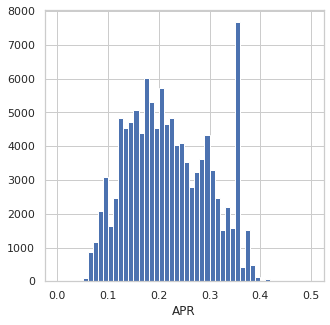

In [338]:
# borrower APR --> numerical
plt.figure(figsize = [5,5])
bins = np.arange(0,0.5+0.01, 0.01)
plt.hist(data= df1, x='BorrowerAPR', bins= bins);
plt.xlabel('APR')
plt.show()

**it noted from this plot that most of the loans were given with an APR range between 0.13 and 0.3 which makes sense for a loan interest, however there is a steep rise at an APR = 3.6 which needs to be further investigated.**

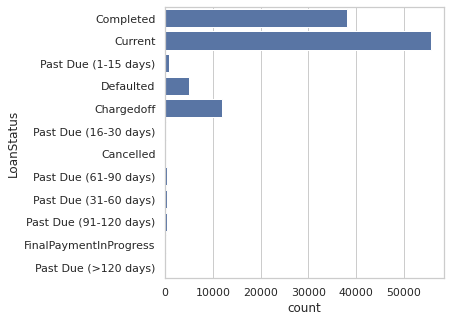

In [339]:
# loanstatus --> categorical
plt.figure(figsize = [5,5])
default_color = sns.color_palette()[0]
sns.countplot(data = df1, y = 'LoanStatus', color = default_color)
plt.show()

### **EDA for numerical features**

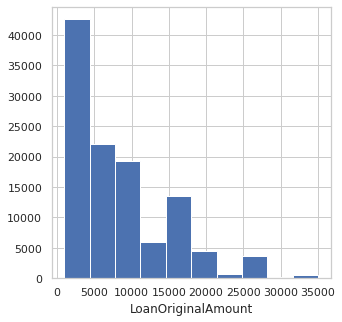

In [340]:
# loan original amount --> numeric
plt.figure(figsize = [5,5])
plt.hist(data= df1, x='LoanOriginalAmount');
plt.xlabel('LoanOriginalAmount')
plt.show()

**it is noted from the plot that most of the loan amount values are in the low values and lower amounts at higher values so we can try the log scale for better interpretation**

In [341]:
df1['LoanOriginalAmount'].value_counts()

4000     14207
15000    12232
10000    10956
5000      6953
2000      6042
         ...  
5284         1
7936         1
1201         1
10593        1
4292         1
Name: LoanOriginalAmount, Length: 2468, dtype: int64

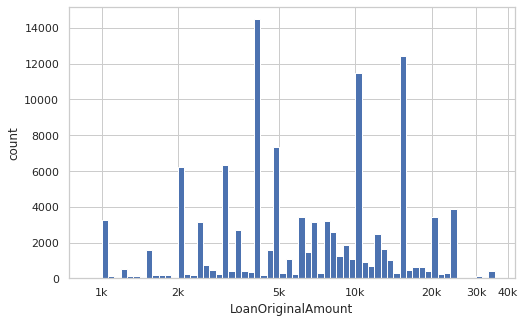

In [342]:
log_binsize = 0.025
bins = 10 ** np.arange(2.95, np.log10(df1['LoanOriginalAmount'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df1, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4 , 3e4, 4e4], ['1k', '2k', '5k', '10k', '20k', '30k', '40k'])
plt.xlabel('LoanOriginalAmount')
plt.ylabel('count')
plt.show()

**The above plot shows that loan amounts of 15k , 10k and 4k are the highest numbers to be given as loans and loans with greater than 25k are rare**

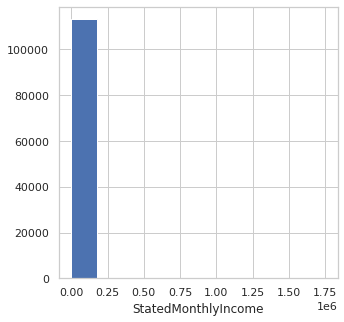

In [343]:
# stated monthly income --> numeric
plt.figure(figsize = [5,5])
plt.hist(data= df1, x='StatedMonthlyIncome');
plt.xlabel('StatedMonthlyIncome')
plt.show()

**it is obvious that most of the data points are in a very low range at first which indicate the prescence of outliers**

In [344]:
# remove outliers
high_outliers = df1['StatedMonthlyIncome'] > 15000
print(high_outliers.sum())
display(df1.loc[high_outliers,:])

2744


,LoanNumber,Term,LoanStatus,BorrowerAPR,ListingCategory (numeric),EmploymentStatus,IsBorrowerHomeowner,PublicRecordsLast10Years,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,Investors
45,87756,60,Current,0.13227,1,Employed,1,0.0,1,16000.000000,25000,543.44,0,515
196,76698,60,Current,0.15752,19,Employed,1,0.0,1,33333.333333,25000,574.73,0,34
208,67378,60,Current,0.23318,1,Employed,1,0.0,1,17500.000000,15000,404.54,0,15
224,126722,36,Current,0.13799,1,Employed,1,0.0,1,33333.333333,30000,982.02,0,1
291,131922,60,Current,0.15868,1,Self-employed,1,0.0,0,25000.000000,15000,345.53,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113669,59767,36,Completed,0.35797,1,Employed,1,0.0,1,19166.666667,4000,173.71,0,1
113776,65398,12,Completed,0.09986,1,Employed,0,0.0,1,23750.000000,3000,258.59,0,53
113792,66785,36,Completed,0.26681,1,Self-employed,1,0.0,0,20000.000000,8000,309.14,0,85
113902,378,36,Completed,0.08805,0,Not available,0,0.0,1,20833.333333,7500,235.44,0,143


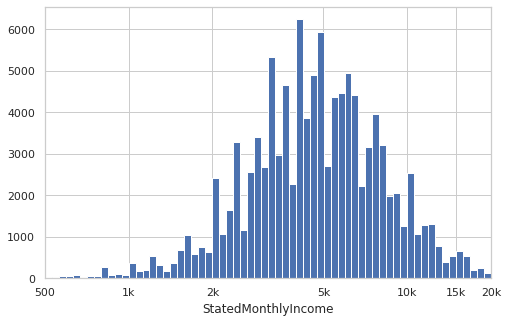

In [345]:
# change to log scale
log_binsize = 0.025
bins = 10 ** np.arange(2.7, 4.3 +log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df1, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 1.5e4 , 2e4], [500, '1k', '2k', '5k', '10k', '15k', '20k'])
plt.xlim([500,20000])
plt.xlabel('StatedMonthlyIncome')
plt.show()

**the plot looks as a normal distribution which shows that people who take loans mostly have an income value between 2k and 15k**

In [346]:
numeric_vars =  ['Term','BorrowerAPR','PublicRecordsLast10Years','StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment','Recommendations','Investors']
categoric_vars = ['LoanStatus','ListingCategory (numeric)', 'EmploymentStatus']
boolean= ['IsBorrowerHomeowner','IncomeVerifiable']

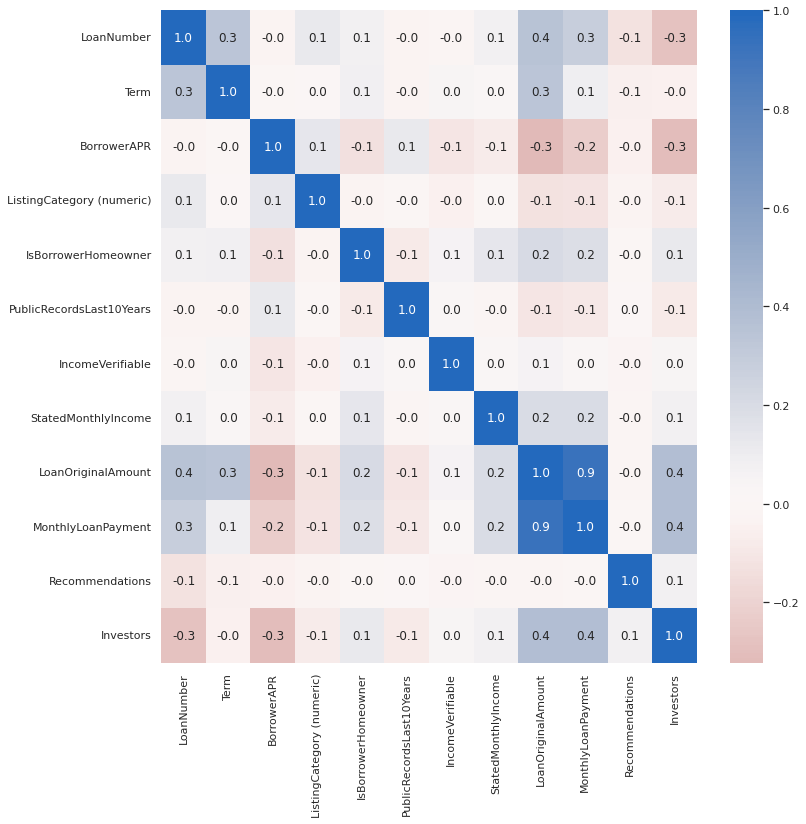

In [347]:
# correlation plot
plt.figure(figsize = [12, 12])
sns.heatmap(df1.corr(), annot = True, fmt = '.1f',
           cmap = 'vlag_r', center = 0)
plt.show()

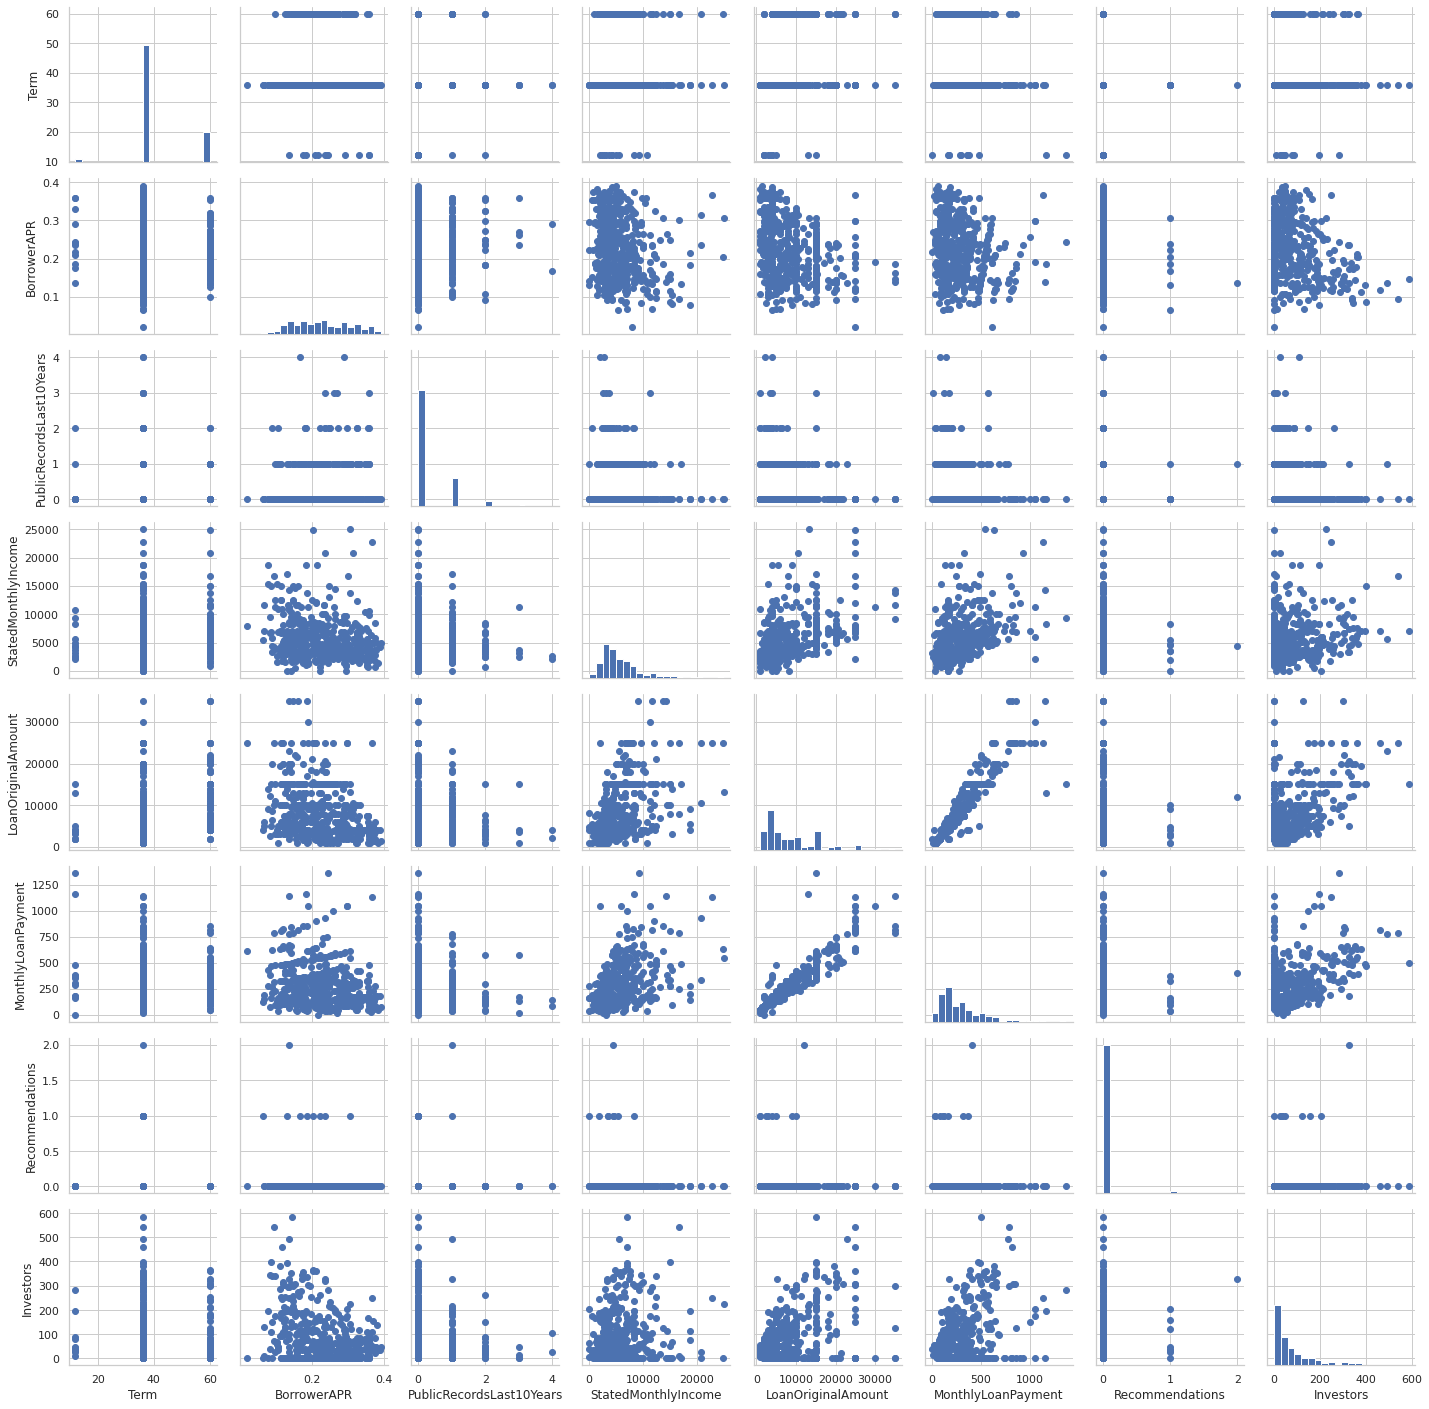

In [348]:
# take sample to plot matrices faster
samples = np.random.choice(df1.shape[0], 500, replace = False)
df1_samp = df1.iloc[samples,:]

g = sns.PairGrid(data = df1_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

a strong correlation is found between monthly loan payment and loan original amount which makes much sense,

another correlation between the loan original amount and the investors which indicate that as number of investors increase, the loan amount increase

a relation is between the term and the loan original amount, as the loan amount increase, it is expected to be paid on a longer period.

a negative relationship between loan original amount and the APR, as loan increase the APR decrease which isn't logic but it this can be due to that there is a limit to the APR

### **EDA for Categorical features**

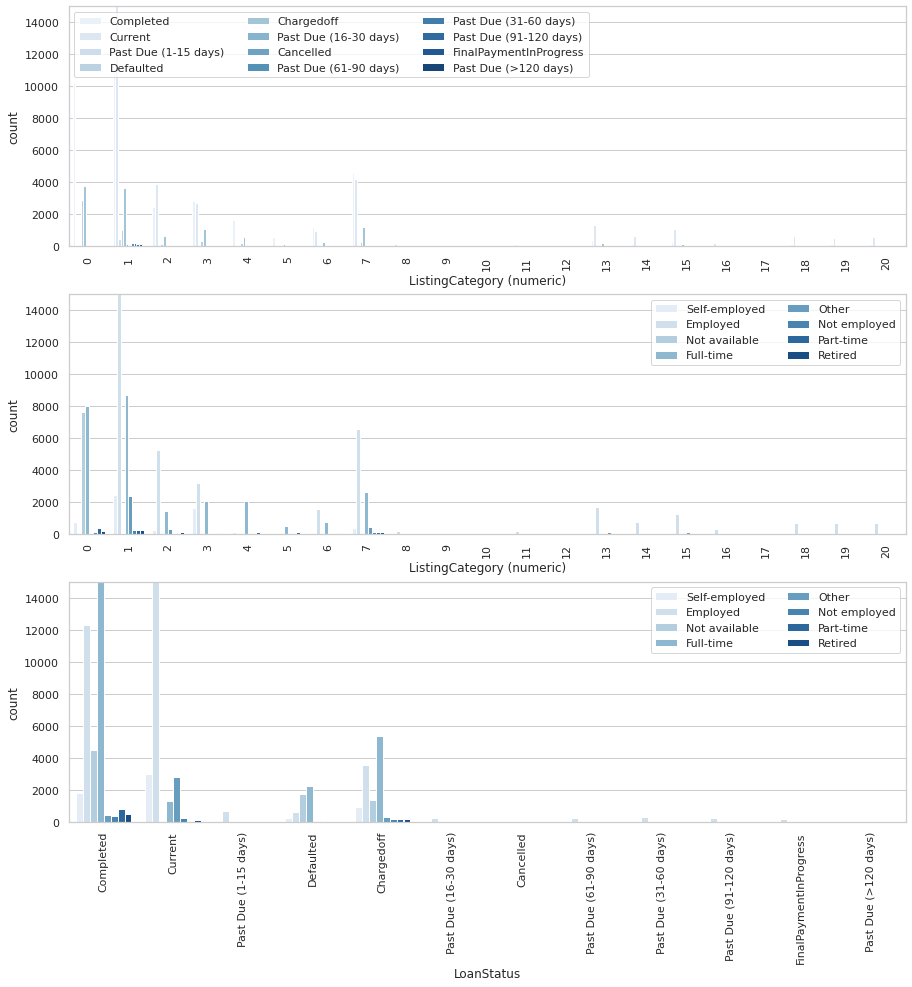

In [349]:
#  ['LoanStatus','ListingCategory (numeric)', 'EmploymentStatus']

plt.figure(figsize = [15, 15])

# subplot 1: LoanStatus vs ListingCategory (numeric)
plt.subplot(3, 1, 1)
sns.countplot(data = df1, hue = 'LoanStatus', x = 'ListingCategory (numeric)', palette = 'Blues', )
plt.xticks(rotation=90)
plt.ylim([0,15000])
plt.legend(loc = 2, ncol = 3)

# subplot 2: LoanStatus vs EmploymentStatus
plt.subplot(3, 1, 2)
sns.countplot(data = df1, hue = 'EmploymentStatus', x = 'ListingCategory (numeric)', palette = 'Blues')
plt.xticks(rotation=90)
plt.ylim([0,15000])
plt.legend(loc = 1,ncol = 2) 

# subplot 3: ListingCategory (numeric) vs EmploymentStatus
plt.subplot(3, 1, 3)
sns.countplot(data = df1, x = 'LoanStatus', hue = 'EmploymentStatus', palette = 'Blues')
plt.xticks(rotation=90)
plt.ylim([0,15000])
plt.legend(loc = 1, ncol = 2) 

plt.show()

1st plot : loan status mostly are completed or current and they are highly appeared at the listing category numbers (0 : not available, 1: debt , 2: home, 3:buisness , 7:other)

2nd plot: it shows that mainly the employed take most of loans to pay their debt or home

3rd polt: it appears that employed and full time have a high completion to the loan as well as current loan, but the charged off show that the full time are the highest to be charged off

# 5.0. Data Modelling & Prediction:

### we will try two different models here:

#### 1- Linear Regression for prediction of Borrower ABR

In [350]:
df_corr = df1.corrwith(df1['BorrowerAPR'], axis=0, drop=False, method='pearson').sort_values(ascending = False)
df_corr

BorrowerAPR                  1.000000
ListingCategory (numeric)    0.132593
PublicRecordsLast10Years     0.122923
Term                        -0.010810
LoanNumber                  -0.033768
Recommendations             -0.044564
StatedMonthlyIncome         -0.082048
IncomeVerifiable            -0.111078
IsBorrowerHomeowner         -0.132594
MonthlyLoanPayment          -0.225925
Investors                   -0.309429
LoanOriginalAmount          -0.322294
dtype: float64

In [351]:
df1 ['intercept'] = 1
lm = sm.OLS (df1 ['BorrowerAPR'] , df1 [['intercept', 'PublicRecordsLast10Years', 'Term','LoanNumber','Recommendations', 'StatedMonthlyIncome','IncomeVerifiable','IsBorrowerHomeowner','MonthlyLoanPayment','Investors','LoanOriginalAmount']] )
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            BorrowerAPR   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     4604.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:26:54   Log-Likelihood:             1.4379e+05
No. Observations:              113066   AIC:                        -2.876e+05
Df Residuals:                  113055   BIC:                        -2.874e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
intercept                    0.1515      0.001    108.884      0.000       0.149       0.154
PublicRecordsLast10Years     0.0074      0.000     26.532      0.000       0.007       0.008
Term                         0.0032   2.82e-05    112.245      0.000       0.003       0.003
LoanNumber               -1.092e-07   6.48e-09    -16.863      0.000   -1.22e-07   -9.65e-08
Recommendations             -0.0075      0.001    -12.348      0.000      -0.009      -0.006
StatedMonthlyIncome       -9.51e-08   2.77e-08     -3.438      0.001   -1.49e-07   -4.09e-08
IncomeVerifiable            -0.0218      0.001    -28.433      0.000      -0.023      -0.020
IsBorrowerHomeowner         -0.0063      0.000    -15.117      0.000      -0.007      -0.005
MonthlyLoanPayment           0.0005   3.85e-06    138.909      0.000       0.001       0.001
Investors                   -0.0002   2.43e-06    -63.832      0.000      -0.000      -0.000
LoanOriginalAmount       -1.987e-05   1.29e-07   -154.074      0.000   -2.01e-05   -1.96e-05
==============================================================================
Omnibus:                     3219.001   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8182.756
Skew:                          -0.063   Prob(JB):                         0.00
Kurtosis:                       4.312   Cond. No.                     5.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [352]:
# first we split the data to train and test for prediction 
linear_vars = ['PublicRecordsLast10Years', 'Term','LoanNumber','Recommendations', 'StatedMonthlyIncome','IncomeVerifiable','IsBorrowerHomeowner','MonthlyLoanPayment','Investors','LoanOriginalAmount']
X= df1[linear_vars] 
y= df1['BorrowerAPR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=21)

In [353]:

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [354]:
y_pred

array([0.27026136, 0.25424859, 0.2036234 , ..., 0.2313386 , 0.24291298,
       0.2715715 ])

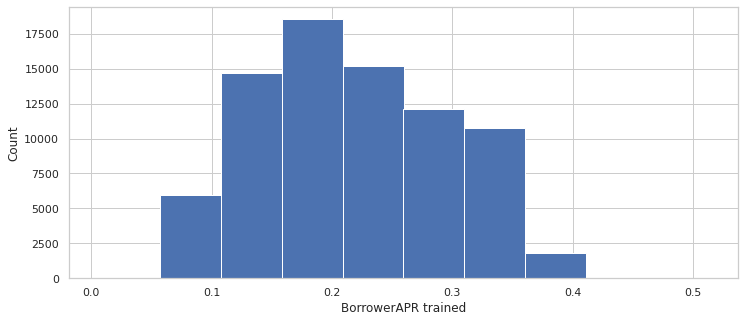

In [355]:
plt.figure(figsize = [12,5])
plt.hist(y_train)
plt.xlabel('BorrowerAPR trained')
plt.ylabel('Count')
plt.show()

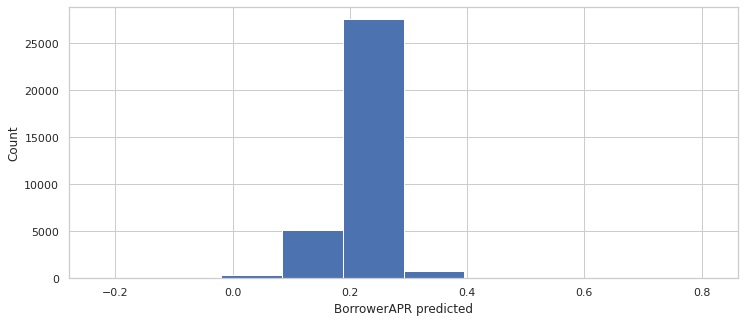

In [356]:
plt.figure(figsize = [12,5])
plt.hist(y_pred)
plt.xlabel('BorrowerAPR predicted')
plt.ylabel('Count')
plt.show()

#### The distribution of both BorrowerAPR Trained and BorrowerAPR Predicted is close to each other but the prediction of the model has most of its output values in the range 0.2 to 0.3, So the model should be further tuned or inserting more features for better prediction

#### 2- Logistic Regression for prediction of loan status

In [357]:
df1['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [358]:
# mapping loan status --> change the values to be 0 & 1
Status_mapping = {
           'Completed': 1,
            'Current': 1,
            'Cancelled': 0,
           'Past Due (1-15 days)': 0,
           'Past Due (16-30 days)': 0,
           'Past Due (61-90 days)': 0,
           'Past Due (91-120 days)': 0,
           'Past Due (31-60 days)': 0,
           'Past Due (>120 days)':0,
            'Defaulted': 0,
            'Chargedoff': 0,
            'FinalPaymentInProgress': 0}

df1['LoanStatus'] = df1['LoanStatus'].map(Status_mapping)
     

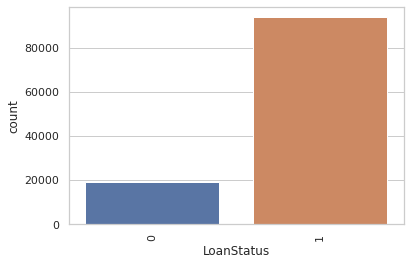

In [359]:
sns.countplot(x=df1['LoanStatus'])
plt.xticks(rotation=90);

In [360]:
logistic_df = df1

logistic_df.drop('EmploymentStatus', axis=1, inplace=True)

labels = logistic_df['LoanStatus']

logistic_df.drop('LoanStatus', axis=1, inplace=True)

logistic_df.shape

(113066, 13)

In [364]:
# splitting
X_train , X_test , y_train , y_test = train_test_split (logistic_df, labels, train_size=0.8 , random_state= 42)

In [365]:
log_mod = LogisticRegression()
log_mod.fit(X_train , y_train) 
y_preds = log_mod.predict(X_test)     

In [366]:
print (precision_score (y_test, y_preds))
print (recall_score (y_test, y_preds))
print (accuracy_score (y_test, y_preds))
confusion_matrix (y_test, y_preds)

0.8506590632887725
0.9660279208025904
0.8304147872999027


array([[  580,  3195],
       [  640, 18199]])

Text(0.5, 257.44, 'Predicted label')

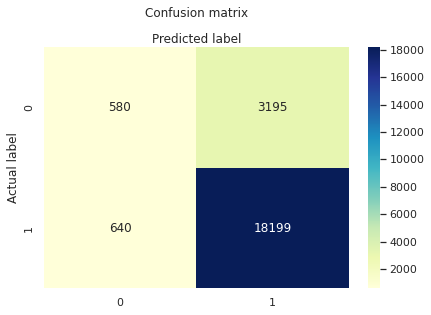

In [371]:
cnf_matrix = metrics.confusion_matrix(y_test, y_preds)
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# References

The following kernels are my main references in creating this notebook:
- [Prosper-Loan Exploratory Data Visualization](https://www.kaggle.com/code/henryokam/prosper-loan-exploratory-data-visualization)

- [Titanic Survival Prediction: Workflow](https://github.com/usm-cos422-522/courseMaterials/blob/main/Labs/titanic-workflow.ipynb)

- [Loan_Completion_Prediction](https://github.com/NoureldinHazem/Prosper-Loan-Predictive-Model/blob/main/Loan_Completion_Prediction_(Team_A).ipynb)